In [ ]:
#!pip install missingno

In [1]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import datetime  as dt
import missingno as msno

In [2]:
ls crime_data_raw/2015

apr15.xls*  dec15.xls*  jan15.xls*  jun15.xls*  may15.xls*  oct15.xls*
aug15.xls*  feb15.xls*  jul15.xls*  mar15.xls*  nov15.xls*  sep15.xls*


In [3]:
path = 'crime_data_raw/2015'

In [ ]:
#ls crime_data_raw/

In [ ]:
# # get premise codes

# pc = pd.read_csv('crime_data_raw/premise_codes.csv')
# pc.head()

In [ ]:
# # rename premise column for easy merge
# pc.rename(columns={'Premise Type': 'Premise',}, inplace=True)
# pc.info()

In [4]:
# combine all files into one df
all_files = glob.glob(os.path.join(path, "*.xls")) 

df_from_each_file = (pd.read_excel(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)

In [5]:
df.head()

,Date,Hour,Offense Type,Beat,Premise,BlockRange,StreetName,Type,Suffix,# offenses
0,2015-02-26,12,Theft,10H10,"Road, Street, or Sidewalk",4900-4999,CANAL,ST,-,1
1,2015-04-05,16,Burglary,10H10,Residence or House,100-199,YORK,-,-,1
2,2015-04-06,20,Rape,10H10,Residence or House,UNK,CANAL,CT,-,1
3,2015-04-16,8,Theft,10H10,Construction Site,400-499,ENNIS,ST,-,1
4,2015-04-01,19,Theft,10H10,NaN,UNK,SIDNEY,-,-,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120009 entries, 0 to 120008
Data columns (total 10 columns):
Date            120009 non-null datetime64[ns]
Hour            120009 non-null int64
Offense Type    120009 non-null object
Beat            120009 non-null object
Premise         117881 non-null object
BlockRange      120009 non-null object
StreetName      120009 non-null object
Type            120009 non-null object
Suffix          120009 non-null object
# offenses      120009 non-null int64
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 9.2+ MB


In [7]:
df[df.Date.isnull()]

,Date,Hour,Offense Type,Beat,Premise,BlockRange,StreetName,Type,Suffix,# offenses


## Inspect Premise col

In [8]:
len(df.Premise.value_counts(dropna=False))

125

In [9]:
df.Premise.value_counts(dropna=False).head()

Residence or House                     16814
Apartment Parking Lot                  13220
Apartment                              11815
Road, Street, or Sidewalk              11390
Restaurant or Cafeteria Parking Lot     4897
Name: Premise, dtype: int64

In [10]:
df.Premise.unique()

array(['Road, Street, or Sidewalk', 'Residence or House',
       'Construction Site', nan, 'Apartment', 'Other Parking Lot',
       "Physician, Doctor, Dentist's Office", 'Apartment Parking Lot',
       'Driveway', 'Warehouse', 'Commercial Parking Lot or Garage',
       'Service or Gas Station', 'Bus Stop',
       'Convenience Store Parking Lot',
       'Parks and Recreation, Zoo, Swimming Pool', 'Hospital',
       'Miscellaneous Business (Non-Specific)',
       'Vacant Single Occ Resd(House,Townhs,Dplex)',
       'Other, Unknown, or Not Listed', 'Convenience Store',
       'Bar or Night Club Parking Lot', 'Field, Woods, Forest, Park',
       'Restaurant or Cafeteria', 'Auto Repair',
       'Stadium, Sports Arena, Race Track',
       'Government or Public Building', 'Bar or Night Club',
       'Commercial Building', 'Factory, Manufacturing, or Industrial',
       'Grocery Store or Supermarket', 'Light Rail Platform',
       'Office Building', 'Garage or Carport', 'Bus Station',
       

In [11]:
df.Premise = df.Premise.str.strip()

In [12]:
len(df.Premise.value_counts(dropna=False))

125

In [13]:
df.Premise.value_counts(dropna=False).head()

Residence or House                     16814
Apartment Parking Lot                  13220
Apartment                              11815
Road, Street, or Sidewalk              11390
Restaurant or Cafeteria Parking Lot     4897
Name: Premise, dtype: int64

In [14]:
# check if  null values
df.isnull().values.any().any()

True

In [15]:
# check su, of null values
df.isnull().values.sum()

2128

In [16]:
len(df[df.isnull().any(axis=1)])

2128

## Visualize our data

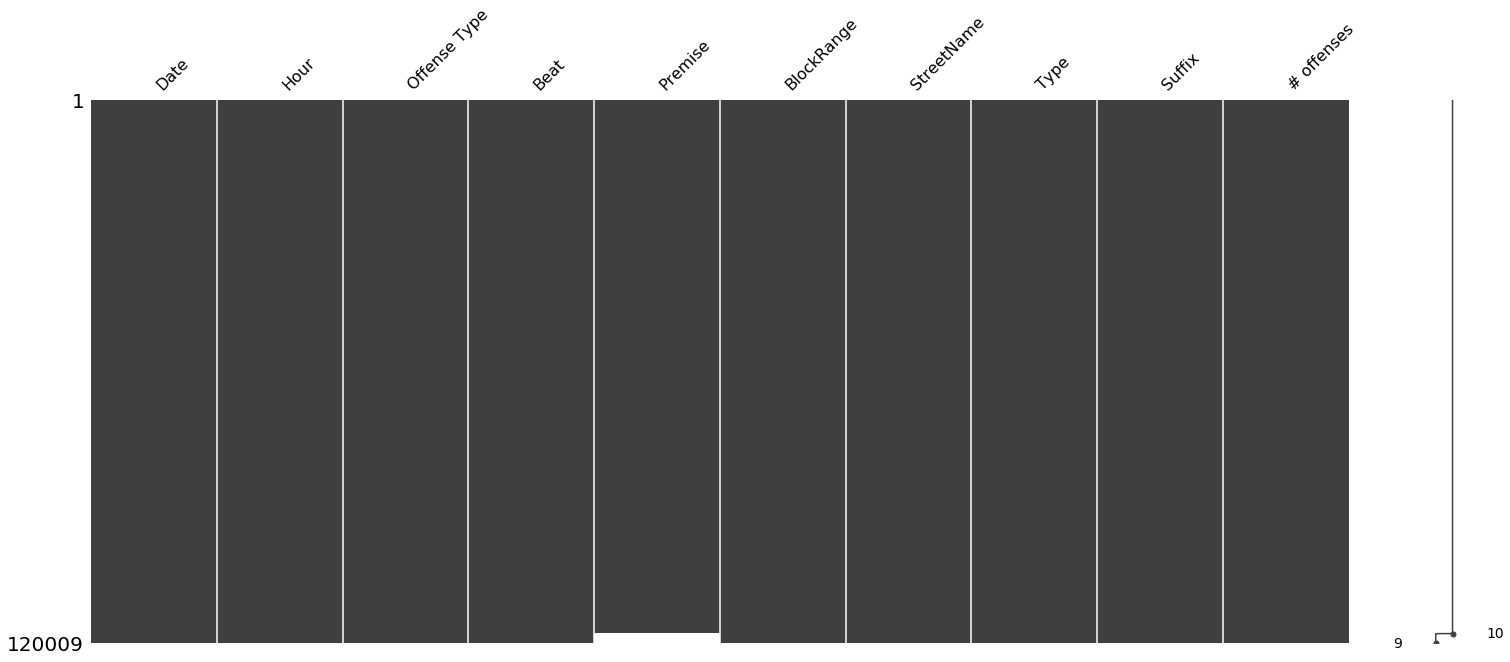

In [17]:
#data = df.replace("nan", np.nan)


sorted_data = msno.nullity_sort(df, sort='descending')
msno.matrix(sorted_data)

## col cleaning

- joining similar columns
- renaming

In [18]:
df.head()

,Date,Hour,Offense Type,Beat,Premise,BlockRange,StreetName,Type,Suffix,# offenses
0,2015-02-26,12,Theft,10H10,"Road, Street, or Sidewalk",4900-4999,CANAL,ST,-,1
1,2015-04-05,16,Burglary,10H10,Residence or House,100-199,YORK,-,-,1
2,2015-04-06,20,Rape,10H10,Residence or House,UNK,CANAL,CT,-,1
3,2015-04-16,8,Theft,10H10,Construction Site,400-499,ENNIS,ST,-,1
4,2015-04-01,19,Theft,10H10,NaN,UNK,SIDNEY,-,-,1


In [ ]:
# # 2014
# # if duplicate columns

# df['BlockRange'] = pd.concat([df['Block Range'].dropna(),
#                               df['BlockRange'].dropna()]).reindex_like(df)

# df['StreetName'] = pd.concat([df['Street Name'].dropna(),
#                               df['StreetName'].dropna()]).reindex_like(df)

# df['# Of Offenses'] = pd.concat([df['# Of'].dropna(),
#                               df['# Of Offenses'].dropna(),
#                               df['# offenses'].dropna(),
#                               df['# Offenses'].dropna()]).reindex_like(df)

In [19]:
df.head()

,Date,Hour,Offense Type,Beat,Premise,BlockRange,StreetName,Type,Suffix,# offenses
0,2015-02-26,12,Theft,10H10,"Road, Street, or Sidewalk",4900-4999,CANAL,ST,-,1
1,2015-04-05,16,Burglary,10H10,Residence or House,100-199,YORK,-,-,1
2,2015-04-06,20,Rape,10H10,Residence or House,UNK,CANAL,CT,-,1
3,2015-04-16,8,Theft,10H10,Construction Site,400-499,ENNIS,ST,-,1
4,2015-04-01,19,Theft,10H10,NaN,UNK,SIDNEY,-,-,1


In [ ]:
# df.rename(columns={
#     '# Of Offenses': 'NumOffenses',
#      'Offense Type': 'OffenseType',
# }, inplace=True)
# df.info()

In [20]:
df.rename(columns={
    '# offenses': 'NumOffenses',
     'Offense Type': 'OffenseType',
}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120009 entries, 0 to 120008
Data columns (total 10 columns):
Date           120009 non-null datetime64[ns]
Hour           120009 non-null int64
OffenseType    120009 non-null object
Beat           120009 non-null object
Premise        117881 non-null object
BlockRange     120009 non-null object
StreetName     120009 non-null object
Type           120009 non-null object
Suffix         120009 non-null object
NumOffenses    120009 non-null int64
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 9.2+ MB


## Subset dataframe to work on 

In [21]:
crimes = df[['Date','Beat','BlockRange','StreetName','OffenseType','Premise','NumOffenses','Hour']]
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120009 entries, 0 to 120008
Data columns (total 8 columns):
Date           120009 non-null datetime64[ns]
Beat           120009 non-null object
BlockRange     120009 non-null object
StreetName     120009 non-null object
OffenseType    120009 non-null object
Premise        117881 non-null object
NumOffenses    120009 non-null int64
Hour           120009 non-null int64
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 7.3+ MB


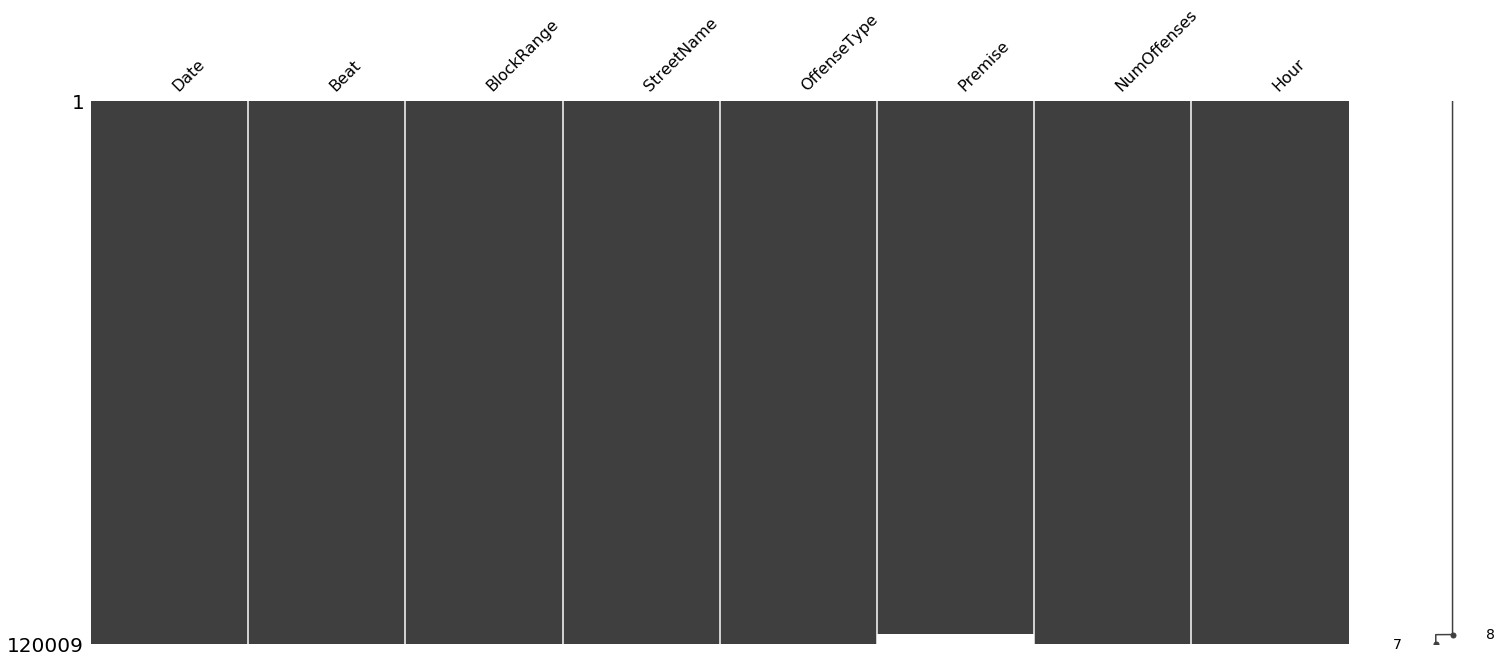

In [22]:

sorted_data = msno.nullity_sort(crimes, sort='descending')
msno.matrix(sorted_data)

# FIND NAN onevery col

In [23]:
len(crimes[crimes.Date.isnull()])

0

In [24]:
crimes[crimes.Date.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


In [25]:
len(crimes[crimes.Beat.isnull()])

0

In [26]:
crimes[crimes.Beat.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


In [27]:
len(crimes[crimes.BlockRange.isnull()])

0

In [28]:
crimes[crimes.BlockRange.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


In [29]:
len(crimes[crimes.StreetName.isnull()])

0

In [30]:
crimes[crimes.StreetName.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


In [31]:
len(crimes[crimes.OffenseType.isnull()])

0

In [32]:
crimes[crimes.OffenseType.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


In [33]:
len(crimes[crimes.Premise.isnull()])

2128

In [34]:
crimes[crimes.Premise.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour
4,2015-04-01,10H10,UNK,SIDNEY,Theft,NaN,1,19
14,2009-05-18,10H10,4500-4599,CANAL,Theft,NaN,1,11
27,2015-04-21,10H10,3300-3399,NAVIGATION,Theft,NaN,1,13
39,2015-04-02,10H20,3800-3899,LAMAR,Burglary,NaN,1,0
56,2015-04-07,10H20,4300-4399,COYLE,Theft,NaN,1,14
91,2015-04-23,10H30,2800-2899,RUSK,Theft,NaN,1,18
134,2015-04-07,10H40,1400-1499,TUAM,Theft,NaN,1,14
135,2015-04-09,10H40,2700-2799,TRAVIS,Theft,NaN,1,18
145,2015-04-07,10H40,1500-1599,ANITA,Burglary,NaN,1,19
285,2015-04-14,10H50,3000-3099,CHARTRES,Theft,NaN,1,22


In [36]:
len(crimes[crimes.NumOffenses.isnull()])

0

In [37]:
crimes[crimes.NumOffenses.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


In [38]:
len(crimes[crimes.Hour.isnull()])

0

In [39]:
crimes[crimes.Hour.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


## Find NaN
- drop if > 2 nan

In [40]:
len(crimes[crimes.isnull().any(axis=1)])

2128

In [41]:
crimes[crimes.isnull().any(axis=1)].head()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour
4,2015-04-01,10H10,UNK,SIDNEY,Theft,NaN,1,19
14,2009-05-18,10H10,4500-4599,CANAL,Theft,NaN,1,11
27,2015-04-21,10H10,3300-3399,NAVIGATION,Theft,NaN,1,13
39,2015-04-02,10H20,3800-3899,LAMAR,Burglary,NaN,1,0
56,2015-04-07,10H20,4300-4399,COYLE,Theft,NaN,1,14


In [ ]:
#crimes = crimes.dropna(thresh=2)

In [ ]:
#crimes[crimes.isnull().any(axis=1)]

## Joint dataframes

In [ ]:
# # join two datarames
# crimes = pd.merge(crimes, pc, on='Premise', how='outer')
# crimes.info()

In [ ]:
#crimes.head()

In [ ]:
#len(crimes[crimes['Premise Description'].isnull()])

In [ ]:
#crimes[crimes['Premise Description'].isnull()].head()

## Problem
- find nan values on one col, and copy related col

In [ ]:
#crimes.Premise.unique()

In [ ]:
#len(crimes[crimes['Premise'] == '---'])

In [ ]:
#len(crimes[crimes['Premise'] == 'N'])

In [ ]:
#crimes[crimes['Premise'] == 'N']

In [ ]:
#crimes.loc[crimes['Premise Description'].isnull(),'Premise Description'] = crimes['Premise']

In [ ]:
#len(crimes[crimes['Premise Description'].isnull()])

In [ ]:

#crimes[crimes['Premise Description'].isnull()]

## Visualize data

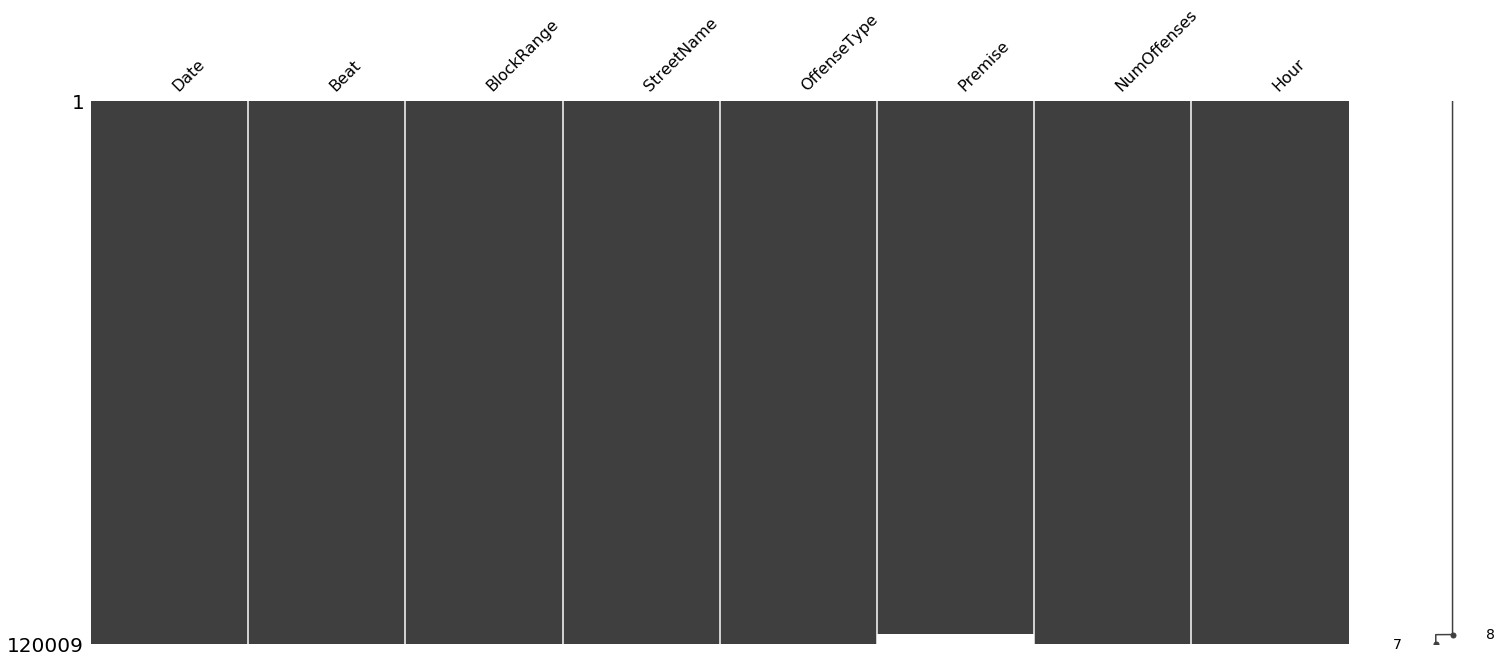

In [42]:
sorted_data = msno.nullity_sort(crimes, sort='descending')
msno.matrix(sorted_data)

## Display any null values

In [43]:
len(crimes[crimes.isnull().any(axis=1)])

2128

In [44]:
crimes[crimes.isnull().any(axis=1)].tail()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour
119838,2014-09-30,9C40,13100-13199,EAST,Rape,NaN,1,4
119846,2015-09-24,9C40,1200-1299,FEDERAL,Burglary,NaN,1,5
119885,2015-09-18,9C40,12400-12499,EAST,Theft,NaN,1,16
119909,2015-09-18,9C40,12600-12699,IH 10,Auto Theft,NaN,1,21
119920,2015-09-10,9C40,12200-12299,EAST,Theft,NaN,1,20


## drop rows with 2 or 3 or more NaN

In [45]:
crimes = crimes.dropna(thresh=3)

In [46]:
len(crimes[crimes.isnull().any(axis=1)])

2128

In [47]:
crimes[crimes.isnull().any(axis=1)].tail()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour
119838,2014-09-30,9C40,13100-13199,EAST,Rape,NaN,1,4
119846,2015-09-24,9C40,1200-1299,FEDERAL,Burglary,NaN,1,5
119885,2015-09-18,9C40,12400-12499,EAST,Theft,NaN,1,16
119909,2015-09-18,9C40,12600-12699,IH 10,Auto Theft,NaN,1,21
119920,2015-09-10,9C40,12200-12299,EAST,Theft,NaN,1,20


## Inspect each column

In [48]:
crimes.dtypes

Date           datetime64[ns]
Beat                   object
BlockRange             object
StreetName             object
OffenseType            object
Premise                object
NumOffenses             int64
Hour                    int64
dtype: object

## Beat

In [49]:
len(crimes.Beat.value_counts())

119

In [50]:
len(crimes.Beat.value_counts(dropna=False))

119

In [51]:
crimes.Beat.unique()

array(['10H10', '10H20', '10H30', '10H40', '10H50', '10H60', '10H70',
       '10H80', '11H10', '11H20', '11H30', '11H40', '11H50', '12D10',
       '12D20', '12D30', '12D40', '12D50', '12D60', '12D70', '13D10',
       '13D20', '13D30', '13D40', '14D10', '14D20', '14D30', '14D40',
       '14D50', '15E10', '15E20', '15E30', '15E40', '16E10', '16E20',
       '16E30', '16E40', '17E10', '17E20', '17E30', '17E40', '18F10',
       '18F20', '18F30', '18F40', '18F50', '18F60', '19G10', '19G20',
       '19G30', '19G40', '19G50', '1A10', '1A20', '1A30', '1A40', '1A50',
       '20G10', '20G20', '20G30', '20G40', '20G50', '20G60', '20G70',
       '20G80', '21I10', '21I30', '21I50', '23J50', '24C10', '24C20',
       '24C30', '24C40', '24C50', '24C60', '2A10', '2A20', '2A30', '2A40',
       '2A50', '2A60', '3B10', '3B30', '3B40', '3B50', '4F10', '4F20',
       '4F30', '5F10', '5F20', '5F30', '5F40', '6B10', '6B20', '6B30',
       '6B40', '6B50', '6B60', '7C10', '7C20', '7C30', '7C40', '7C50',
       '

In [52]:
# replace extra ' with empty space
crimes['Beat'] = crimes.Beat.str.replace("'", " ")

In [53]:
len(crimes.Beat.value_counts(dropna=False))

119

In [54]:
# strip empty spaces
crimes.Beat = crimes.Beat.str.strip()

In [55]:
len(crimes.Beat.value_counts(dropna=False))  # get the total

119

In [56]:
crimes.Beat.unique()

array(['10H10', '10H20', '10H30', '10H40', '10H50', '10H60', '10H70',
       '10H80', '11H10', '11H20', '11H30', '11H40', '11H50', '12D10',
       '12D20', '12D30', '12D40', '12D50', '12D60', '12D70', '13D10',
       '13D20', '13D30', '13D40', '14D10', '14D20', '14D30', '14D40',
       '14D50', '15E10', '15E20', '15E30', '15E40', '16E10', '16E20',
       '16E30', '16E40', '17E10', '17E20', '17E30', '17E40', '18F10',
       '18F20', '18F30', '18F40', '18F50', '18F60', '19G10', '19G20',
       '19G30', '19G40', '19G50', '1A10', '1A20', '1A30', '1A40', '1A50',
       '20G10', '20G20', '20G30', '20G40', '20G50', '20G60', '20G70',
       '20G80', '21I10', '21I30', '21I50', '23J50', '24C10', '24C20',
       '24C30', '24C40', '24C50', '24C60', '2A10', '2A20', '2A30', '2A40',
       '2A50', '2A60', '3B10', '3B30', '3B40', '3B50', '4F10', '4F20',
       '4F30', '5F10', '5F20', '5F30', '5F40', '6B10', '6B20', '6B30',
       '6B40', '6B50', '6B60', '7C10', '7C20', '7C30', '7C40', '7C50',
       '

In [57]:
crimes.Beat.value_counts(dropna=False).head()

1A20     2716
13D20    2667
19G10    2548
6B60     2493
12D10    2466
Name: Beat, dtype: int64

## BlockRange

In [58]:
len(crimes.BlockRange.value_counts(dropna=False))

245

In [59]:
crimes.BlockRange.value_counts(dropna=False).head()

2300-2399    1678
100-199      1663
900-999      1577
UNK          1560
800-899      1496
Name: BlockRange, dtype: int64

In [60]:
# strip
crimes.BlockRange = crimes.BlockRange.str.strip()

In [61]:
len(crimes.BlockRange.value_counts(dropna=False))

245

## StreetName

In [62]:
print('before:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

before:7918


In [63]:
crimes.StreetName = crimes.StreetName.str.strip()

In [64]:
print('after:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

after:7913


In [65]:
print(crimes.StreetName.value_counts(dropna=False).head())

WESTHEIMER     3623
GULF           2138
SAM HOUSTON    1718
NORTH          1701
LOOP           1573
Name: StreetName, dtype: int64


## OffenseType

In [66]:
print('before:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

before:8


In [67]:
crimes.OffenseType = crimes.OffenseType.str.strip()

In [68]:
print('after:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

after:8


In [69]:
print(crimes.OffenseType.value_counts(dropna=False))

Theft                 66309
Burglary              19824
Auto Theft            13113
Robbery               10274
Aggravated Assault     9209
Rape                    985
Murder                  287
NaN                       8
Name: OffenseType, dtype: int64


## Premise

In [70]:
print('before:{}'.format(len(crimes.Premise.value_counts(dropna=False))))

before:125


In [71]:
crimes.Premise = crimes.Premise.str.strip()

In [72]:
print('after:{}'.format(len(crimes.Premise.value_counts(dropna=False))))

after:125


In [73]:
crimes.Premise.value_counts(dropna=False).head()

Residence or House                     16814
Apartment Parking Lot                  13220
Apartment                              11815
Road, Street, or Sidewalk              11390
Restaurant or Cafeteria Parking Lot     4897
Name: Premise, dtype: int64

## Premise Description

In [ ]:
#print('before:{}'.format(len(crimes['Premise Description'].value_counts(dropna=False))))

In [ ]:
#crimes.Beat = crimes.Beat.str.replace(r"\'(.+?)\'", ' ')
#crimes['Premise Description'] = crimes['Premise Description'].str.strip()

In [ ]:
#print('after:{}'.format(len(crimes['Premise Description'].value_counts(dropna=False))))

In [ ]:
#print(crimes['Premise Description'].value_counts(dropna=False).head())

# Set Date as index

In [74]:
# date
crimes.Date = pd.to_datetime(crimes.Date)

crimes = crimes.set_index('Date').sort_index(ascending=True)

In [75]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour
Date,,,,,,,
1915-01-05,3B10,3200-3299,MANGUM RD 180,Theft,Other Parking Lot,1,22
1915-01-14,5F10,7000-7099,WESTVIEW,Auto Theft,Apartment Parking Lot,1,23
1915-04-24,1A20,3100-3199,SMITH,Burglary,Office Building,1,7
1915-07-30,11H10,5600-5699,TRUETT,Rape,"Other, Unknown, or Not Listed",1,10
1915-09-03,19G20,11700-11799,BEECHNUT,Burglary,Rental Storage Facility,1,13


## Create Columns with day,weekday,month,year from date index

In [76]:
# get day, weekday,month ,year

crimes['day'] = crimes.index.strftime('%d')
crimes['weekday'] = crimes.index.strftime('%A')
crimes['month'] = crimes.index.strftime('%b')
crimes['year'] = crimes.index.strftime('%Y')

In [77]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1915-01-05,3B10,3200-3299,MANGUM RD 180,Theft,Other Parking Lot,1,22,05,Tuesday,Jan,1915
1915-01-14,5F10,7000-7099,WESTVIEW,Auto Theft,Apartment Parking Lot,1,23,14,Thursday,Jan,1915
1915-04-24,1A20,3100-3199,SMITH,Burglary,Office Building,1,7,24,Saturday,Apr,1915
1915-07-30,11H10,5600-5699,TRUETT,Rape,"Other, Unknown, or Not Listed",1,10,30,Friday,Jul,1915
1915-09-03,19G20,11700-11799,BEECHNUT,Burglary,Rental Storage Facility,1,13,03,Friday,Sep,1915


## null values

- check
- count
- display

In [78]:
crimes.isnull().values.any().any()

True

In [79]:
# display any null

len(crimes[crimes.isnull().any(axis=1)])

2162

In [80]:
crimes[crimes.isnull().any(axis=1)].head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1991-05-23,17E10,6700-6799,HORNWOOD,Rape,NaN,1,21,23,Thursday,May,1991
1993-04-01,5F20,3900-3999,HOLLISTER,Rape,NaN,1,13,01,Thursday,Apr,1993
1998-01-01,17E10,6100-6199,GLENMONT,Rape,NaN,1,23,01,Thursday,Jan,1998
1999-01-01,UNK,8400-8499,STONE,Rape,NaN,1,14,01,Friday,Jan,1999
2000-05-01,18F20,5000-5099,WESTHEIMER,Theft,NaN,1,11,01,Monday,May,2000


In [81]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120009 entries, 1915-01-05 to 2015-12-31
Data columns (total 11 columns):
Beat           120009 non-null object
BlockRange     120009 non-null object
StreetName     119981 non-null object
OffenseType    120001 non-null object
Premise        117881 non-null object
NumOffenses    120009 non-null int64
Hour           120009 non-null int64
day            120009 non-null object
weekday        120009 non-null object
month          120009 non-null object
year           120009 non-null object
dtypes: int64(2), object(9)
memory usage: 13.5+ MB


## New Dataframe
- remove premise col
- keep premise description

In [82]:
crime_yr = crimes[['Beat','BlockRange','StreetName','OffenseType','Premise','NumOffenses','Hour','day','weekday','month','year']]
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1915-01-05,3B10,3200-3299,MANGUM RD 180,Theft,Other Parking Lot,1,22,05,Tuesday,Jan,1915
1915-01-14,5F10,7000-7099,WESTVIEW,Auto Theft,Apartment Parking Lot,1,23,14,Thursday,Jan,1915
1915-04-24,1A20,3100-3199,SMITH,Burglary,Office Building,1,7,24,Saturday,Apr,1915
1915-07-30,11H10,5600-5699,TRUETT,Rape,"Other, Unknown, or Not Listed",1,10,30,Friday,Jul,1915
1915-09-03,19G20,11700-11799,BEECHNUT,Burglary,Rental Storage Facility,1,13,03,Friday,Sep,1915


In [83]:
crime_yr.isnull().values.any().any()

True

In [84]:
# display any null

len(crime_yr[crime_yr.isnull().any(axis=1)])

2162

In [85]:
crime_yr[crime_yr.isnull().any(axis=1)].tail()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
2015-12-30,19G50,9600-9699,BISSONNET,Theft,NaN,1,21,30,Wednesday,Dec,2015
2015-12-30,1A30,3600-3699,SHEPHERD,Theft,NaN,1,23,30,Wednesday,Dec,2015
2015-12-30,6B50,11400-11499,NORTH,Theft,NaN,1,23,30,Wednesday,Dec,2015
2015-12-30,10H30,800-899,SAINT EMANUEL,Theft,NaN,1,2,30,Wednesday,Dec,2015
2015-12-31,20G50,700-799,SAM HOUSTON,Theft,NaN,1,8,31,Thursday,Dec,2015


# FIND NANS

## INDEX

In [86]:
len(crime_yr[crime_yr.index.isnull()])

0

In [87]:
crime_yr[crime_yr.index.isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


In [88]:
# drop index nans
crime_yr.index.dropna(how='any')

DatetimeIndex(['1915-01-05', '1915-01-14', '1915-04-24', '1915-07-30',
               '1915-09-03', '1915-09-29', '1915-12-15', '1915-12-25',
               '1916-06-24', '1964-03-23',
               ...
               '2015-12-31', '2015-12-31', '2015-12-31', '2015-12-31',
               '2015-12-31', '2015-12-31', '2015-12-31', '2015-12-31',
               '2015-12-31', '2015-12-31'],
              dtype='datetime64[ns]', name='Date', length=120009, freq=None)

In [89]:
len(crime_yr[crime_yr.index.isnull()])

0

## Beat

In [90]:
len(crime_yr[crime_yr.Beat.isnull()])

0

In [91]:
crime_yr[crime_yr.Beat.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


In [92]:
crime_yr.Beat = crime_yr.Beat.replace(np.nan, 'UNK')

In [93]:
len(crime_yr[crime_yr.Beat.isnull()])

0

In [94]:
crime_yr[crime_yr.Beat.isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


## BlockRAnge

In [95]:
len(crime_yr[crime_yr.BlockRange.isnull()])

0

In [96]:
crime_yr[crime_yr.BlockRange.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


## StreetName

In [97]:
len(crime_yr[crime_yr.StreetName.isnull()])

28

In [98]:
crime_yr[crime_yr.StreetName.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
2014-12-27,21I10,UNK,NaN,Theft,Airport Terminal,1,9,27,Saturday,Dec,2014
2015-01-03,13D40,UNK,NaN,Burglary,Residence or House,1,20,03,Saturday,Jan,2015
2015-01-05,2A30,UNK,NaN,Theft,Driveway,1,15,05,Monday,Jan,2015
2015-04-04,2A30,UNK,NaN,Theft,"Road, Street, or Sidewalk",1,0,04,Saturday,Apr,2015
2015-04-05,2A30,UNK,NaN,Theft,"Road, Street, or Sidewalk",1,7,05,Sunday,Apr,2015


In [99]:
crime_yr.StreetName = crime_yr.StreetName.replace(np.nan, 'UNK')

In [100]:
len(crime_yr[crime_yr.StreetName.isnull()])

0

## OffenseType

In [101]:
len(crime_yr[crime_yr.OffenseType.isnull()])

8

In [102]:
crime_yr[crime_yr.OffenseType.isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
2013-08-31,8C50,9200-9299,NYSSA,NaN,NaN,1,0,31,Saturday,Aug,2013
2013-09-27,UNK,1500-1599,BAILEY ST 424,NaN,Apartment,1,6,27,Friday,Sep,2013
2015-01-01,12D10,800-899,EASTLAKE,NaN,NaN,1,0,01,Thursday,Jan,2015
2015-03-19,4F10,9300-9399,LONG POINT,NaN,Apartment,1,21,19,Thursday,Mar,2015
2015-04-05,10H20,4900-4999,MCKINNEY,NaN,"Road, Street, or Sidewalk",1,20,05,Sunday,Apr,2015
2015-04-10,17E40,11200-11299,FONDREN,NaN,Service or Gas Station,1,18,10,Friday,Apr,2015
2015-07-30,13D40,8400-8499,TAVENOR,NaN,Residence or House,1,16,30,Thursday,Jul,2015
2015-12-04,17E40,7800-7899,AIRPORT,NaN,Apartment,1,13,04,Friday,Dec,2015


In [103]:
crime_yr.OffenseType = crime_yr.OffenseType.replace(np.nan, 'UNK')

In [104]:
len(crime_yr[crime_yr.OffenseType.isnull()])

0

## Hour

In [105]:
len(crime_yr[crime_yr.Hour.isnull()])

0

In [106]:
crime_yr[crime_yr.Hour.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


## Premsie 

In [107]:
len(crime_yr[crime_yr['Premise'].isnull()])

2128

In [108]:
crime_yr[crime_yr['Premise'].isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1991-05-23,17E10,6700-6799,HORNWOOD,Rape,NaN,1,21,23,Thursday,May,1991
1993-04-01,5F20,3900-3999,HOLLISTER,Rape,NaN,1,13,01,Thursday,Apr,1993
1998-01-01,17E10,6100-6199,GLENMONT,Rape,NaN,1,23,01,Thursday,Jan,1998
1999-01-01,UNK,8400-8499,STONE,Rape,NaN,1,14,01,Friday,Jan,1999
2000-05-01,18F20,5000-5099,WESTHEIMER,Theft,NaN,1,11,01,Monday,May,2000


In [109]:
crime_yr['Premise'] = crime_yr['Premise'].replace(np.nan, 'No label')

In [110]:
len(crime_yr[crime_yr['Premise'].isnull()])

0

In [111]:
crime_yr[crime_yr['Premise'].isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


In [112]:
# display any null

len(crime_yr[crime_yr.isnull().any(axis=1)])

0

In [113]:
crime_yr[crime_yr.isnull().any(axis=1)]

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


## Save

In [115]:
crime_yr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120009 entries, 1915-01-05 to 2015-12-31
Data columns (total 11 columns):
Beat           120009 non-null object
BlockRange     120009 non-null object
StreetName     120009 non-null object
OffenseType    120009 non-null object
Premise        120009 non-null object
NumOffenses    120009 non-null int64
Hour           120009 non-null int64
day            120009 non-null object
weekday        120009 non-null object
month          120009 non-null object
year           120009 non-null object
dtypes: int64(2), object(9)
memory usage: 13.5+ MB


In [114]:
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1915-01-05,3B10,3200-3299,MANGUM RD 180,Theft,Other Parking Lot,1,22,05,Tuesday,Jan,1915
1915-01-14,5F10,7000-7099,WESTVIEW,Auto Theft,Apartment Parking Lot,1,23,14,Thursday,Jan,1915
1915-04-24,1A20,3100-3199,SMITH,Burglary,Office Building,1,7,24,Saturday,Apr,1915
1915-07-30,11H10,5600-5699,TRUETT,Rape,"Other, Unknown, or Not Listed",1,10,30,Friday,Jul,1915
1915-09-03,19G20,11700-11799,BEECHNUT,Burglary,Rental Storage Facility,1,13,03,Friday,Sep,1915


In [116]:
ls crime_data_clean/new

crime10_clean.csv*  crime14_clean.csv*  Final_crime10_clean.csv*
crime11_clean.csv*  crime15_clean.csv*  Final_crime11_clean.csv*
crime12_clean.csv*  crime16_clean.csv*  Final_crime12_clean.csv*
crime13_clean.csv*  crime17_clean.csv*  Final_crime13_clean.csv*


In [117]:
crime_yr.to_csv('crime_data_clean/new/Final_crime15_clean.csv')

In [118]:
ls crime_data_clean/new

crime10_clean.csv*  crime15_clean.csv*        Final_crime12_clean.csv*
crime11_clean.csv*  crime16_clean.csv*        Final_crime13_clean.csv*
crime12_clean.csv*  crime17_clean.csv*        Final_crime15_clean.csv*
crime13_clean.csv*  Final_crime10_clean.csv*
crime14_clean.csv*  Final_crime11_clean.csv*
